## Initial Setup and Data Overview

Please fill out:
* Student name: Will VanDerKloot
* Student pace: full time
* Scheduled project review date/time: NA
* Instructor name: Abhineet 
* Blog post URL: NA


In [1]:
# import modules, import data - create dataframe. 


import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline 

data = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [2]:
#Examine overall data correlations between columns 
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


## Data Cleaning

In [3]:
# Identifys the numbe of duplicates in the ID column 
id_dupe = df[df.duplicated('id')]
print(f'There are {len(id_dupe)} duplicates in the id column') 

There are 177 duplicates in the id column


In [4]:
# I dentifies the number of missing or Null values in each column 
for col in df:
    missing = df[col].isna().sum()
    if missing > 0:
        print(f'{col} has {missing} NaN or Null values')

waterfront has 2376 NaN or Null values
view has 63 NaN or Null values
yr_renovated has 3842 NaN or Null values


In [5]:
#Quickly looking at the number of unique values of yr_renovated. 
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [6]:
# based on the missing data, as well as the low correlation values - these columns are dropped form the dataset. 
df.drop(labels = ['yr_renovated'], axis = 1, inplace = True)
df.drop(labels = ['yr_built'], axis = 1, inplace = True)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
# Get waterfron unique values 
display(df.waterfront.nunique())
df.waterfront.unique()

2

array([nan,  0.,  1.])

In [9]:
#create table of counts of waterfront values 
df.waterfront.value_counts(normalize = True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [10]:
#set all missing values to NA 
df['waterfront'].fillna("NA", inplace=True)

#Create weighted probability of missing values 
wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

#create a function to randomly assign a vlaue based on weighted probability:

def fill_missing_wf (value):    
    if value == "NA":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
    
#Map values to dataframe
df.waterfront = df.waterfront.map(lambda x: fill_missing_wf(x))


df['waterfront'].value_counts(normalize=True) 

0.0    0.992499
1.0    0.007501
Name: waterfront, dtype: float64

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007501,0.233863,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086285,0.765686,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Date Adjustments
The date field is tricky in difficult to deal with in a dd/mm/yy format. So to utilize date as a useful variable we will look at the specific months in order to determine which times of the year are the most successful for selling property.

In [12]:
import datetime as dt

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,2


In [14]:
df.drop('sqft_basement', axis = 1, inplace=True)

## Data Analysis 

### Analysis of Seatle Zip Codes and their effect on price

In [15]:
seattlezips = [98188,98199,98174,98154,98158,98164,98101,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98121,98122,98125,98126,98133,98134,98136,
98144]

# Applying the above list to sort zipcode column by 1 or 0 for seattle or not seattle. 
df['seattle'] = df['zipcode'].apply(lambda i: 1 if i in seattlezips else 0)



In [16]:
df.seattle.value_counts()

0    14735
1     6862
Name: seattle, dtype: int64

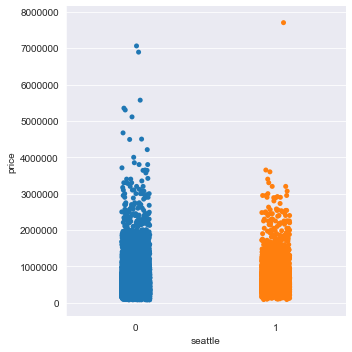

In [17]:
sns.set_style('darkgrid')
sns.catplot(x='seattle', y='price', data=df)

In conclusion it is lear that the seatle specific zip codes in king county do not have a noticeable effect on price. 

### Examinine Bedrooms vs price and creating cat codes and bins 

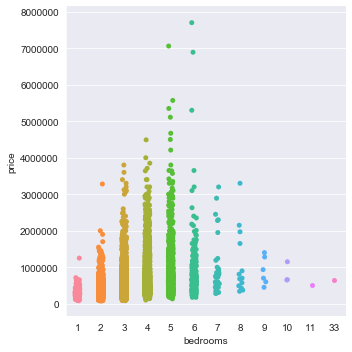

In [18]:

sns.catplot(x='bedrooms', y='price', data=df)

In [19]:

df = pd.concat([df,pd.get_dummies(df['bedrooms'], prefix='bedroom', drop_first=True)],axis=1).drop(['bedrooms'],axis=1)
df.head(10)



,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,bedroom_3,bedroom_4,bedroom_5,bedroom_6,bedroom_7,bedroom_8,bedroom_9,bedroom_10,bedroom_11,bedroom_33
0,7129300520,2014-10-13,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
1,6414100192,2014-12-09,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,0,1,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
5,7237550310,2014-05-12,1230000.0,4.50,5420,101930,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,0,0,0
6,1321400060,2014-06-27,257500.0,2.25,1715,6819,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
7,2008000270,2015-01-15,291850.0,1.50,1060,9711,1.0,0.0,NaN,3,...,1,0,0,0,0,0,0,0,0,0
8,2414600126,2015-04-15,229500.0,1.00,1780,7470,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0
9,3793500160,2015-03-12,323000.0,2.50,1890,6560,2.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,0


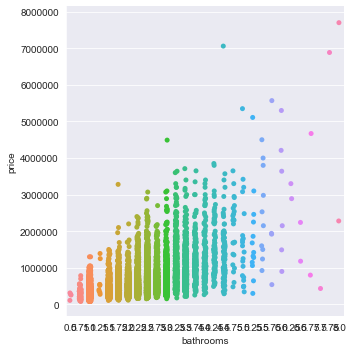

In [20]:
sns.catplot(x="bathrooms", y="price", data=df)

In [21]:
bins = [0, 1,2,3,4,5, 6, 7, 8]
df['bathroom_bins'] = pd.cut(df['bathrooms'], bins,include_lowest = True)

df.head(10)

,id,date,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,bedroom_4,bedroom_5,bedroom_6,bedroom_7,bedroom_8,bedroom_9,bedroom_10,bedroom_11,bedroom_33,bathroom_bins
0,7129300520,2014-10-13,221900.0,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(-0.001, 1.0]"
1,6414100192,2014-12-09,538000.0,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(2.0, 3.0]"
2,5631500400,2015-02-25,180000.0,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(-0.001, 1.0]"
3,2487200875,2014-12-09,604000.0,3.00,1960,5000,1.0,0.0,0.0,5,...,1,0,0,0,0,0,0,0,0,"(2.0, 3.0]"
4,1954400510,2015-02-18,510000.0,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(1.0, 2.0]"
5,7237550310,2014-05-12,1230000.0,4.50,5420,101930,1.0,0.0,0.0,3,...,1,0,0,0,0,0,0,0,0,"(4.0, 5.0]"
6,1321400060,2014-06-27,257500.0,2.25,1715,6819,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(2.0, 3.0]"
7,2008000270,2015-01-15,291850.0,1.50,1060,9711,1.0,0.0,NaN,3,...,0,0,0,0,0,0,0,0,0,"(1.0, 2.0]"
8,2414600126,2015-04-15,229500.0,1.00,1780,7470,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(-0.001, 1.0]"
9,3793500160,2015-03-12,323000.0,2.50,1890,6560,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,"(2.0, 3.0]"


The 3-5 Bedroom range sees the greatest increase in prices - but with multi-bedroom homes in every price catagory

In [22]:
##Binning and preparing for modeling

In [23]:
df = pd.concat([df,pd.get_dummies(df['floors'], prefix='floors', drop_first=True)],axis=1).drop(['floors'],axis=1)

df.head(10)

,id,date,price,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,...,bedroom_9,bedroom_10,bedroom_11,bedroom_33,bathroom_bins,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,2014-10-13,221900.0,1.00,1180,5650,0.0,0.0,3,7,...,0,0,0,0,"(-0.001, 1.0]",0,0,0,0,0
1,6414100192,2014-12-09,538000.0,2.25,2570,7242,0.0,0.0,3,7,...,0,0,0,0,"(2.0, 3.0]",0,1,0,0,0
2,5631500400,2015-02-25,180000.0,1.00,770,10000,0.0,0.0,3,6,...,0,0,0,0,"(-0.001, 1.0]",0,0,0,0,0
3,2487200875,2014-12-09,604000.0,3.00,1960,5000,0.0,0.0,5,7,...,0,0,0,0,"(2.0, 3.0]",0,0,0,0,0
4,1954400510,2015-02-18,510000.0,2.00,1680,8080,0.0,0.0,3,8,...,0,0,0,0,"(1.0, 2.0]",0,0,0,0,0
5,7237550310,2014-05-12,1230000.0,4.50,5420,101930,0.0,0.0,3,11,...,0,0,0,0,"(4.0, 5.0]",0,0,0,0,0
6,1321400060,2014-06-27,257500.0,2.25,1715,6819,0.0,0.0,3,7,...,0,0,0,0,"(2.0, 3.0]",0,1,0,0,0
7,2008000270,2015-01-15,291850.0,1.50,1060,9711,0.0,NaN,3,7,...,0,0,0,0,"(1.0, 2.0]",0,0,0,0,0
8,2414600126,2015-04-15,229500.0,1.00,1780,7470,0.0,0.0,3,7,...,0,0,0,0,"(-0.001, 1.0]",0,0,0,0,0
9,3793500160,2015-03-12,323000.0,2.50,1890,6560,0.0,0.0,3,7,...,0,0,0,0,"(2.0, 3.0]",0,1,0,0,0


In [24]:
df = pd.concat([df,pd.get_dummies(df['zipcode'], prefix='zip',drop_first=True)],axis=1,).drop(['zipcode'],axis=1)

df.head(10)

,id,date,price,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,2014-10-13,221900.0,1.00,1180,5650,0.0,0.0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,2.25,2570,7242,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,1.00,770,10000,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,3.00,1960,5000,0.0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,2.00,1680,8080,0.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0
5,7237550310,2014-05-12,1230000.0,4.50,5420,101930,0.0,0.0,3,11,...,0,0,0,0,0,0,0,0,0,0
6,1321400060,2014-06-27,257500.0,2.25,1715,6819,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
7,2008000270,2015-01-15,291850.0,1.50,1060,9711,0.0,NaN,3,7,...,0,0,0,0,0,0,0,0,1,0
8,2414600126,2015-04-15,229500.0,1.00,1780,7470,0.0,0.0,3,7,...,1,0,0,0,0,0,0,0,0,0
9,3793500160,2015-03-12,323000.0,2.50,1890,6560,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0


In [25]:
zip_col = [col for col in df if col.startswith('zip') or col.startswith('price')]
zip_col

['price',
 'zip_98002',
 'zip_98003',
 'zip_98004',
 'zip_98005',
 'zip_98006',
 'zip_98007',
 'zip_98008',
 'zip_98010',
 'zip_98011',
 'zip_98014',
 'zip_98019',
 'zip_98022',
 'zip_98023',
 'zip_98024',
 'zip_98027',
 'zip_98028',
 'zip_98029',
 'zip_98030',
 'zip_98031',
 'zip_98032',
 'zip_98033',
 'zip_98034',
 'zip_98038',
 'zip_98039',
 'zip_98040',
 'zip_98042',
 'zip_98045',
 'zip_98052',
 'zip_98053',
 'zip_98055',
 'zip_98056',
 'zip_98058',
 'zip_98059',
 'zip_98065',
 'zip_98070',
 'zip_98072',
 'zip_98074',
 'zip_98075',
 'zip_98077',
 'zip_98092',
 'zip_98102',
 'zip_98103',
 'zip_98105',
 'zip_98106',
 'zip_98107',
 'zip_98108',
 'zip_98109',
 'zip_98112',
 'zip_98115',
 'zip_98116',
 'zip_98117',
 'zip_98118',
 'zip_98119',
 'zip_98122',
 'zip_98125',
 'zip_98126',
 'zip_98133',
 'zip_98136',
 'zip_98144',
 'zip_98146',
 'zip_98148',
 'zip_98155',
 'zip_98166',
 'zip_98168',
 'zip_98177',
 'zip_98178',
 'zip_98188',
 'zip_98198',
 'zip_98199']

In [26]:
df.drop(['sqft_lot', 'sqft_lot15'], axis=1, inplace=True)


In [27]:
df.drop('date', axis=1, inplace=True)

In [28]:
df.drop('id', axis=1, inplace=True)

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing

In [30]:
## Modeling

In [31]:
df.columns

Index(['price', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'lat', 'long', 'sqft_living15', 'month',
       'seattle', 'bedroom_2', 'bedroom_3', 'bedroom_4', 'bedroom_5',
       'bedroom_6', 'bedroom_7', 'bedroom_8', 'bedroom_9', 'bedroom_10',
       'bedroom_11', 'bedroom_33', 'bathroom_bins', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'z

In [32]:
print(df.columns)

Index(['price', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'lat', 'long', 'sqft_living15', 'month',
       'seattle', 'bedroom_2', 'bedroom_3', 'bedroom_4', 'bedroom_5',
       'bedroom_6', 'bedroom_7', 'bedroom_8', 'bedroom_9', 'bedroom_10',
       'bedroom_11', 'bedroom_33', 'bathroom_bins', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022',
       'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029',
       'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034',
       'zip_98038', 'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058',
       'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074',
       'zip_98075', 'zip_98077', 'zip_98092', 'z

In [33]:
df.applymap(np.isreal)

,price,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,lat,long,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
21593,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
21594,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
21595,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [35]:
df.describe()

,price,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_above,lat,long,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,2.159700e+04,21597.000000,21597.000000,21597.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,2.115826,2080.321850,0.007501,0.233863,3.409825,7.657915,1788.596842,47.560093,-122.213982,...,0.013335,0.002639,0.020651,0.011761,0.012455,0.011807,0.012131,0.006297,0.012965,0.014678
std,3.673681e+05,0.768984,918.106125,0.086285,0.765686,0.650546,1.173200,827.759761,0.138552,0.140724,...,0.114708,0.051307,0.142216,0.107811,0.110909,0.108020,0.109475,0.079106,0.113125,0.120263
min,7.800000e+04,0.500000,370.000000,0.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,1.750000,1430.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,47.471100,-122.328000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,2.250000,1910.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,47.571800,-122.231000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,2.500000,2550.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,47.678000,-122.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,8.000000,13540.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X = df.drop('price', axis=1)

y = df['price']

y = y.astype(float)
X = X.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)
x_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model_f = sm.OLS(y_train, x_train).fit()
results_df = pd.concat([x_train, y_train], axis=1)
model_fit.summary()

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [ ]:
model_predictions = model_f.predict(X_test)

In [ ]:
plt.scatter(y_test, model_predictions)

In [ ]:
sns.distplot(predictions)